## [EI-DA 전자산업 데이터분석]  TV Shipment Analysis

**<div style="text-align: right">Update date: June 1, 2023.</div>**
**<div style="text-align: right">Copyright(c) 2018-2023 Youngmin Park All rights reserved.</div>**

**"CONFIDENTIAL.TV_shipment_20210716.csv" : 지역별 TV 선적 실적에 대한 데이터**

## 라이브러리 임포트

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.rcParams['font.family'] = ['NanumBarunGothic', 'Malgun Gothic', 'AppleGothic']  # 한글 출력을 위한 글꼴 설정
plt.rcParams['axes.unicode_minus'] = False    # 문자 - (마이너스) 정상 출력을 위한 코드

## 데이터 불러오기 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
rawdata_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/python_visualization/data/CONFIDENTIAL.TV_shipment_20210716.csv', index_col=0)

In [4]:
rawdata_df

,2016,2017,2018,2019,2020,2021E,2022E,2023E
Quantity (000s),,,,,,,,
Japan,5043.7720,4960.90800,5240.52200,5556.387,6294.62800,6600.00000,5800.00000,5300.00000
North America,43524.0868,41637.51744,43892.53100,42531.892,51937.45599,47482.00000,40700.00000,42200.00000
Western Europe,29939.5740,29377.95200,29135.49558,30145.910,31027.11100,32218.00000,30273.00000,28550.00000
Eastern Europe,14570.6360,14729.26500,15483.14075,16537.124,17286.47700,16709.00000,16775.00000,15921.00000
China,59789.2100,53685.85100,54533.15000,53108.499,47375.80600,46168.00000,47316.00000,49383.00000
Asia & Oceania,33598.6320,34464.87500,36690.49400,38091.309,34235.02700,35216.00000,37258.00000,38674.00000
Latin America & the Caribbean,22221.2340,23221.78907,24165.89400,24492.926,24164.51800,25288.00000,25381.00000,24160.00000
Middle East & Africa,14049.6300,13094.31100,12221.69500,12450.704,13148.90900,13376.40372,13866.43992,13159.70298
Total,222736.7748,215172.46850,221362.92230,222914.751,225469.93200,223057.40370,217369.43990,217347.70300


## EDA 탐색적 데이터 분석 수행하기

In [5]:
# 데이터의 형태
rawdata_df.shape

(9, 8)

In [6]:
# 데이터 컬럼 정보
rawdata_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Japan to Total
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2016    9 non-null      float64
 1   2017    9 non-null      float64
 2   2018    9 non-null      float64
 3   2019    9 non-null      float64
 4   2020    9 non-null      float64
 5   2021E   9 non-null      float64
 6   2022E   9 non-null      float64
 7   2023E   9 non-null      float64
dtypes: float64(8)
memory usage: 648.0+ bytes


In [7]:
# 데이터 통계 정보
rawdata_df.describe()

,2016,2017,2018,2019,2020,2021E,2022E,2023E
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,49497.061067,47816.104112,49191.760514,49536.611333,50104.429332,49568.311936,48304.319980,48299.489553
std,67068.341732,64556.944186,66444.637486,66759.432879,67467.170789,66564.630193,64808.495137,65012.701517
min,5043.772000,4960.908000,5240.522000,5556.387000,6294.628000,6600.000000,5800.000000,5300.000000
25%,14570.636000,14729.265000,15483.140750,16537.124000,17286.477000,16709.000000,16775.000000,15921.000000
50%,29939.574000,29377.952000,29135.495580,30145.910000,31027.111000,32218.000000,30273.000000,28550.000000
75%,43524.086800,41637.517440,43892.531000,42531.892000,47375.806000,46168.000000,40700.000000,42200.000000
max,222736.774800,215172.468500,221362.922300,222914.751000,225469.932000,223057.403700,217369.439900,217347.703000


## 데이터 시각화 해보기

우선 Pie Chart를 빠르게 하나 그려봅니다

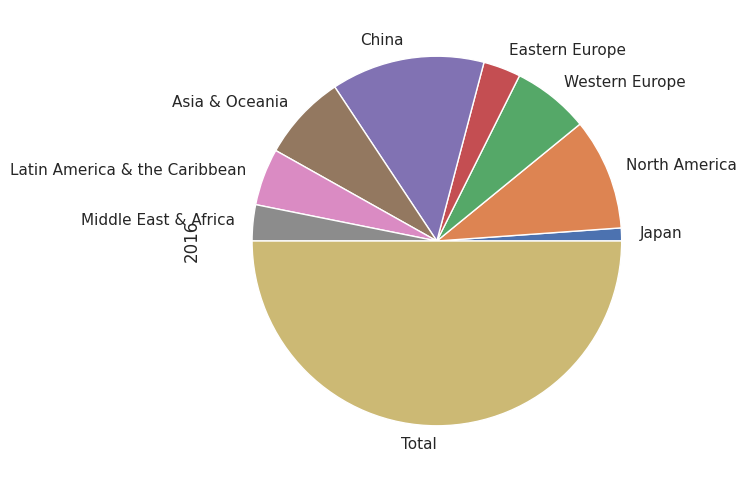

In [8]:
rawdata_df['2016'].plot(figsize=(12,6), kind='pie');

Total이 포함되어 있어, 그래프가 왜곡됩니다.  
Total을 제거한 후, 그래프를 그려야 의도대로 점유율을 볼 수 있습니다.

In [9]:
# .drop 함수를 이용하여 index 혹은 column을 제거할 수 있습니다.
# 제거할 대상으로 인덱스를 하나 넣어주어도 되고, 리스트로 여러개를 넣을 수 있습니다.
rawdata_df.drop(index=['Japan', 'Total'])

,2016,2017,2018,2019,2020,2021E,2022E,2023E
Quantity (000s),,,,,,,,
North America,43524.0868,41637.51744,43892.53100,42531.892,51937.45599,47482.00000,40700.00000,42200.00000
Western Europe,29939.5740,29377.95200,29135.49558,30145.910,31027.11100,32218.00000,30273.00000,28550.00000
Eastern Europe,14570.6360,14729.26500,15483.14075,16537.124,17286.47700,16709.00000,16775.00000,15921.00000
China,59789.2100,53685.85100,54533.15000,53108.499,47375.80600,46168.00000,47316.00000,49383.00000
Asia & Oceania,33598.6320,34464.87500,36690.49400,38091.309,34235.02700,35216.00000,37258.00000,38674.00000
Latin America & the Caribbean,22221.2340,23221.78907,24165.89400,24492.926,24164.51800,25288.00000,25381.00000,24160.00000
Middle East & Africa,14049.6300,13094.31100,12221.69500,12450.704,13148.90900,13376.40372,13866.43992,13159.70298


In [10]:
# Total 행을 제거한 dataframe을 새로 할당
shipment_graph_df = rawdata_df.drop(index='Total')
shipment_graph_df

,2016,2017,2018,2019,2020,2021E,2022E,2023E
Quantity (000s),,,,,,,,
Japan,5043.7720,4960.90800,5240.52200,5556.387,6294.62800,6600.00000,5800.00000,5300.00000
North America,43524.0868,41637.51744,43892.53100,42531.892,51937.45599,47482.00000,40700.00000,42200.00000
Western Europe,29939.5740,29377.95200,29135.49558,30145.910,31027.11100,32218.00000,30273.00000,28550.00000
Eastern Europe,14570.6360,14729.26500,15483.14075,16537.124,17286.47700,16709.00000,16775.00000,15921.00000
China,59789.2100,53685.85100,54533.15000,53108.499,47375.80600,46168.00000,47316.00000,49383.00000
Asia & Oceania,33598.6320,34464.87500,36690.49400,38091.309,34235.02700,35216.00000,37258.00000,38674.00000
Latin America & the Caribbean,22221.2340,23221.78907,24165.89400,24492.926,24164.51800,25288.00000,25381.00000,24160.00000
Middle East & Africa,14049.6300,13094.31100,12221.69500,12450.704,13148.90900,13376.40372,13866.43992,13159.70298


Total이 제거된 graph df로 차트를 다시 그려봅니다

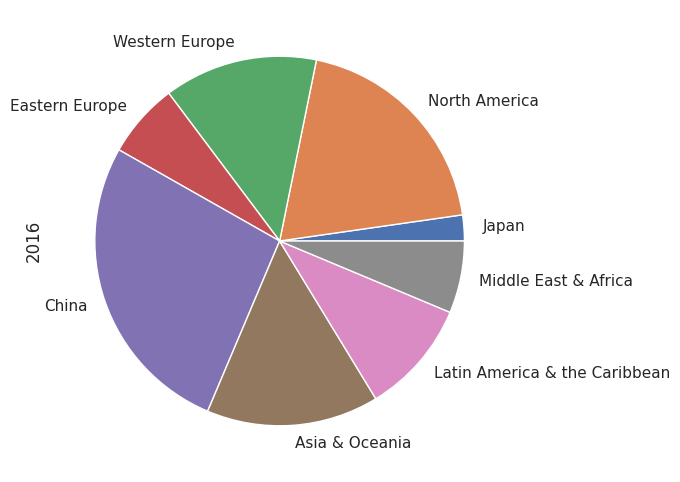

In [11]:
shipment_graph_df['2016'].plot(figsize=(12,6), kind='pie');

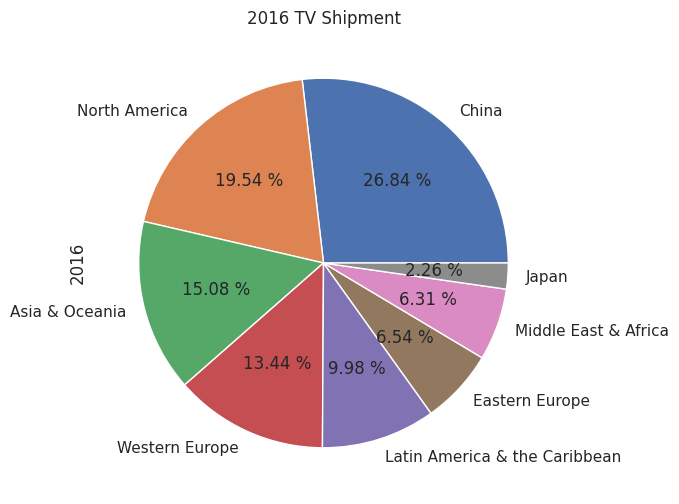

In [12]:
# 정렬이 되어있으면 좋겠습니다. sort_values()를 사용합니다.
shipment_graph_df['2016'].sort_values(ascending=False).plot(figsize=(12,6), kind='pie', autopct='%.2f %%');
plt.title('2016 TV Shipment')
plt.show()

Pie 그래프를 그리는 부분을 함수화 해봅니다

In [13]:
def draw_yearly_pie_chart(shipment_graph_df, column_name='2016'):
    shipment_graph_df[column_name].sort_values(ascending=False).plot(figsize=(12,6), kind='pie', autopct='%.2f %%');
    plt.title(f'{column_name} TV Shipment')
    plt.show()

만든 함수를 이용하여 그래프를 쉽게 그려봅시다.

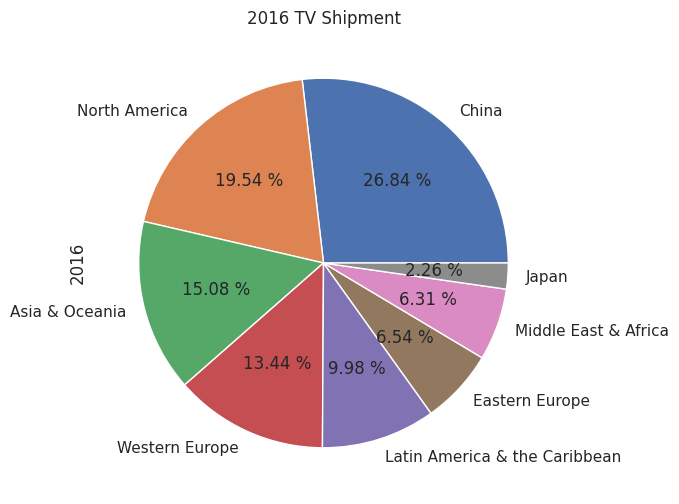

In [14]:
# 2016
draw_yearly_pie_chart(shipment_graph_df, '2016')

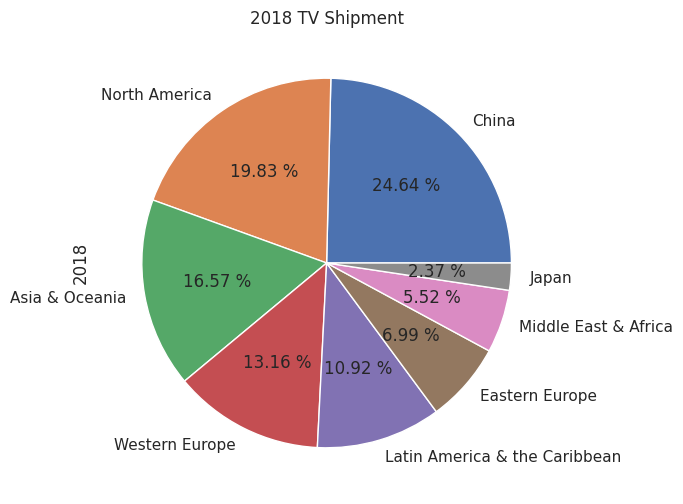

In [15]:
# 2018
draw_yearly_pie_chart(shipment_graph_df, '2018')

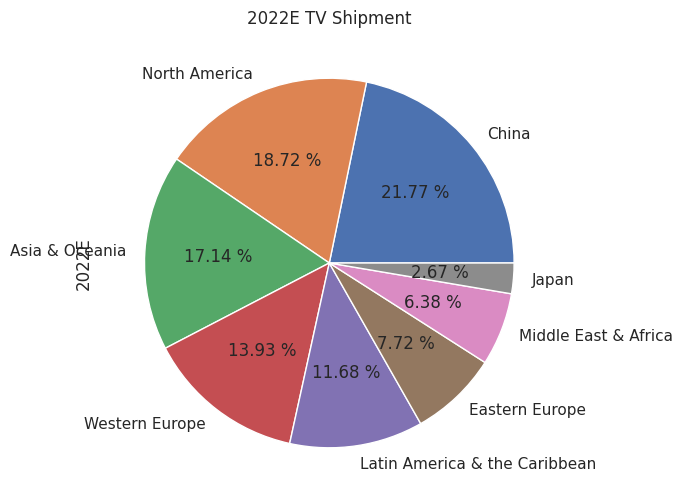

In [16]:
# 2022E
draw_yearly_pie_chart(shipment_graph_df, '2022E')

시계열로 년도에 따라 변화하는 것을 보기 위해 다른 그래프를 그려봅니다

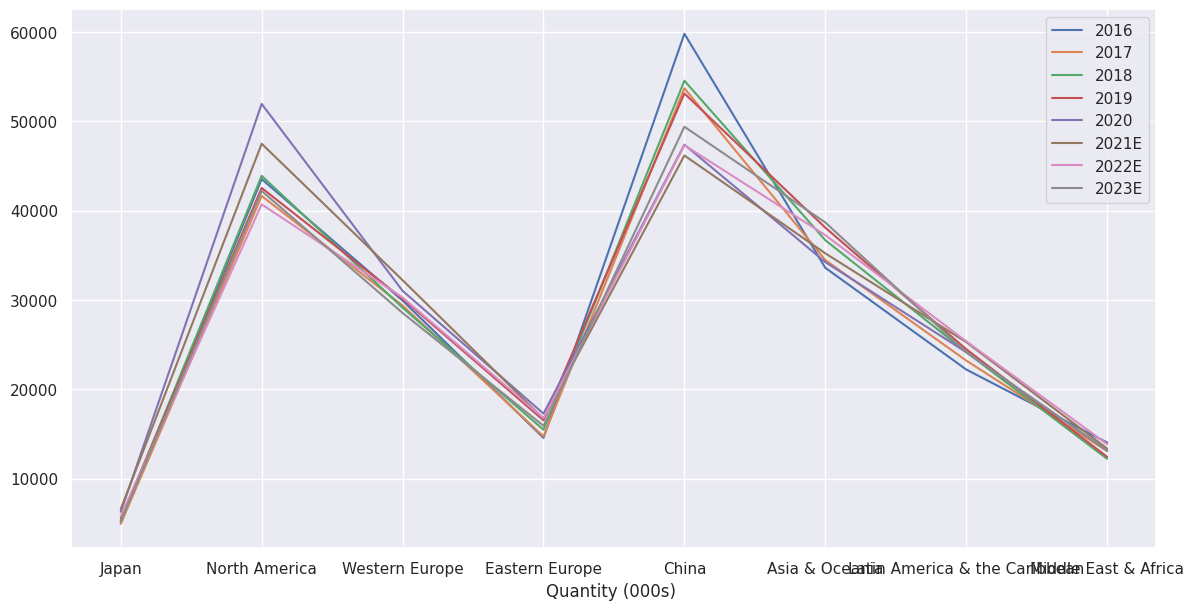

In [17]:
shipment_graph_df.plot(figsize=(14,7));

우리가 원하는 그래프는 년도에 따른 shipment 그래프이므로, DataFrame의 모양을 반전하여야 합니다.

```.T``` 코드를 통해 행렬을 뒤집을 수 있습니다. (Transpose)

In [18]:
shipment_graph_df

,2016,2017,2018,2019,2020,2021E,2022E,2023E
Quantity (000s),,,,,,,,
Japan,5043.7720,4960.90800,5240.52200,5556.387,6294.62800,6600.00000,5800.00000,5300.00000
North America,43524.0868,41637.51744,43892.53100,42531.892,51937.45599,47482.00000,40700.00000,42200.00000
Western Europe,29939.5740,29377.95200,29135.49558,30145.910,31027.11100,32218.00000,30273.00000,28550.00000
Eastern Europe,14570.6360,14729.26500,15483.14075,16537.124,17286.47700,16709.00000,16775.00000,15921.00000
China,59789.2100,53685.85100,54533.15000,53108.499,47375.80600,46168.00000,47316.00000,49383.00000
Asia & Oceania,33598.6320,34464.87500,36690.49400,38091.309,34235.02700,35216.00000,37258.00000,38674.00000
Latin America & the Caribbean,22221.2340,23221.78907,24165.89400,24492.926,24164.51800,25288.00000,25381.00000,24160.00000
Middle East & Africa,14049.6300,13094.31100,12221.69500,12450.704,13148.90900,13376.40372,13866.43992,13159.70298


In [19]:
shipment_graph_df_T = shipment_graph_df.T
shipment_graph_df_T

Quantity (000s),Japan,North America,Western Europe,Eastern Europe,China,Asia & Oceania,Latin America & the Caribbean,Middle East & Africa
2016,5043.772,43524.08680,29939.57400,14570.63600,59789.210,33598.632,22221.23400,14049.63000
2017,4960.908,41637.51744,29377.95200,14729.26500,53685.851,34464.875,23221.78907,13094.31100
2018,5240.522,43892.53100,29135.49558,15483.14075,54533.150,36690.494,24165.89400,12221.69500
2019,5556.387,42531.89200,30145.91000,16537.12400,53108.499,38091.309,24492.92600,12450.70400
2020,6294.628,51937.45599,31027.11100,17286.47700,47375.806,34235.027,24164.51800,13148.90900
2021E,6600.000,47482.00000,32218.00000,16709.00000,46168.000,35216.000,25288.00000,13376.40372
2022E,5800.000,40700.00000,30273.00000,16775.00000,47316.000,37258.000,25381.00000,13866.43992
2023E,5300.000,42200.00000,28550.00000,15921.00000,49383.000,38674.000,24160.00000,13159.70298


.T를 통해 시계열이 인덱스축으로 오게 만든 shipment_graph_df_T로 다시 plot해봅시다

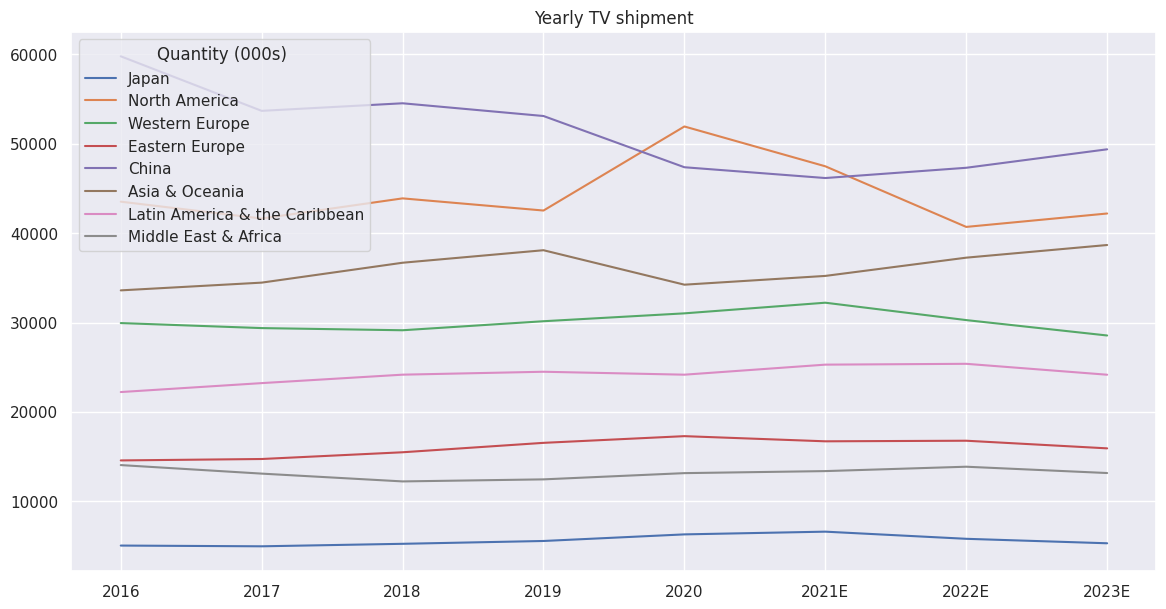

In [20]:
shipment_graph_df_T.plot(figsize=(14,7));
plt.title('Yearly TV shipment')
plt.show()

누적 값으로 Area Plot을 그려봅시다

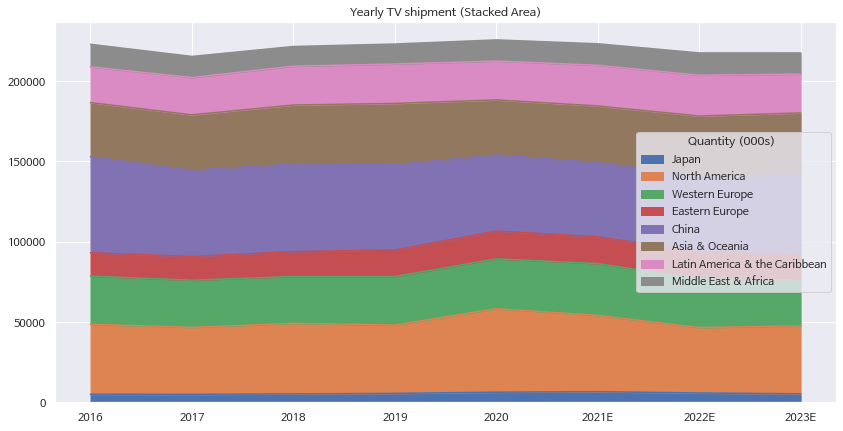

In [ ]:
shipment_graph_df_T.plot(figsize=(14,7), kind='area');
plt.title('Yearly TV shipment (Stacked Area)')
plt.show()

## 데이터 분석 해보기

데이터 분석을 본격적으로 진행해보겠습니다.  
데이터 분석에서는 기존의 데이터를 가공하여 새로운 관찰을 하고는 합니다.  
각 지역의 시장 성장을 비교하기 위해 시계열 수치들을 첫 년도의 수치로 나누어봅니다.

In [21]:
shipment_graph_df_T / shipment_graph_df_T.loc['2016']

Quantity (000s),Japan,North America,Western Europe,Eastern Europe,China,Asia & Oceania,Latin America & the Caribbean,Middle East & Africa
2016,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2017,0.983571,0.956655,0.981241,1.010887,0.897919,1.025782,1.045027,0.932004
2018,1.039009,1.008465,0.973143,1.062626,0.912090,1.092023,1.087514,0.869894
2019,1.101633,0.977204,1.006892,1.134962,0.888262,1.133716,1.102231,0.886194
2020,1.248000,1.193304,1.036324,1.186391,0.792381,1.018941,1.087452,0.935890
2021E,1.308544,1.090936,1.076101,1.146758,0.772179,1.048138,1.138011,0.952082
2022E,1.149933,0.935114,1.011137,1.151288,0.791380,1.108914,1.142196,0.986961
2023E,1.050801,0.969578,0.953587,1.092677,0.825952,1.151059,1.087248,0.936658


첫 년도 (2016) 대비 선적 수치의 비율 (성장률)을 그려봅니다

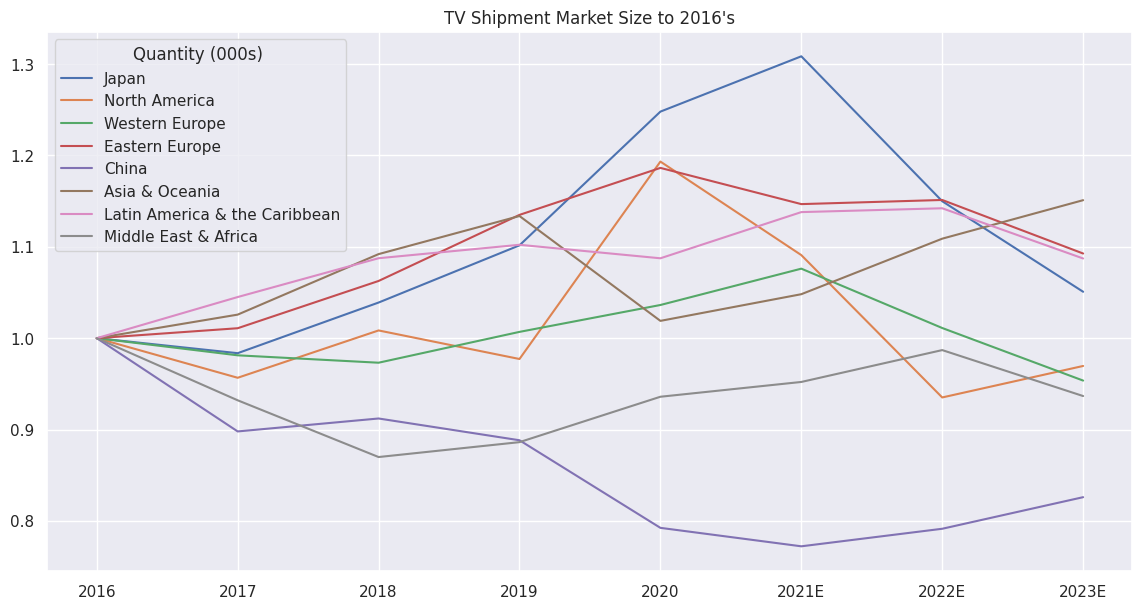

In [22]:
(shipment_graph_df_T / shipment_graph_df_T.loc['2016']).plot(figsize=(14,7));
plt.title("TV Shipment Market Size to 2016's")
plt.show()

2016년도의 수치를 1로 하여, 각 시장별로 어떠한 성장 그래프를 그려왔는지 볼 수 있습니다.  
- 2021년까지 가장 큰 성장을 보여준 시장은 Japan 입니다.  (2016년 대비 +30% 이상)
- 반면, 2021년까지 가장 크게 역성장한 시장은 China 입니다.  (2016년 대비 -20% 이하)

이번에는 각 년도별 Shipment의 변화량을 살펴보겠습니다.  
```.diff()``` 함수로 row와 직전 row의 차이 값을 구할 수 있습니다.

In [23]:
shipment_graph_df_T

Quantity (000s),Japan,North America,Western Europe,Eastern Europe,China,Asia & Oceania,Latin America & the Caribbean,Middle East & Africa
2016,5043.772,43524.08680,29939.57400,14570.63600,59789.210,33598.632,22221.23400,14049.63000
2017,4960.908,41637.51744,29377.95200,14729.26500,53685.851,34464.875,23221.78907,13094.31100
2018,5240.522,43892.53100,29135.49558,15483.14075,54533.150,36690.494,24165.89400,12221.69500
2019,5556.387,42531.89200,30145.91000,16537.12400,53108.499,38091.309,24492.92600,12450.70400
2020,6294.628,51937.45599,31027.11100,17286.47700,47375.806,34235.027,24164.51800,13148.90900
2021E,6600.000,47482.00000,32218.00000,16709.00000,46168.000,35216.000,25288.00000,13376.40372
2022E,5800.000,40700.00000,30273.00000,16775.00000,47316.000,37258.000,25381.00000,13866.43992
2023E,5300.000,42200.00000,28550.00000,15921.00000,49383.000,38674.000,24160.00000,13159.70298


In [25]:
shipment_graph_df_T.diff()

Quantity (000s),Japan,North America,Western Europe,Eastern Europe,China,Asia & Oceania,Latin America & the Caribbean,Middle East & Africa
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,-82.864,-1886.56936,-561.62200,158.62900,-6103.359,866.243,1000.55507,-955.31900
2018,279.614,2255.01356,-242.45642,753.87575,847.299,2225.619,944.10493,-872.61600
2019,315.865,-1360.63900,1010.41442,1053.98325,-1424.651,1400.815,327.03200,229.00900
2020,738.241,9405.56399,881.20100,749.35300,-5732.693,-3856.282,-328.40800,698.20500
2021E,305.372,-4455.45599,1190.88900,-577.47700,-1207.806,980.973,1123.48200,227.49472
2022E,-800.000,-6782.00000,-1945.00000,66.00000,1148.000,2042.000,93.00000,490.03620
2023E,-500.000,1500.00000,-1723.00000,-854.00000,2067.000,1416.000,-1221.00000,-706.73694


diff를 년도별 막대그래프로 그려봅시다

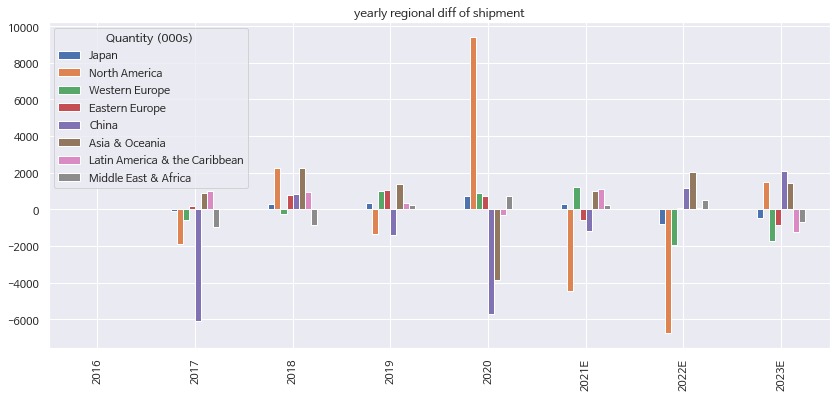

In [ ]:
shipment_graph_df_T.diff().plot(figsize=(14,6), kind='bar');
plt.title('yearly regional diff of shipment');

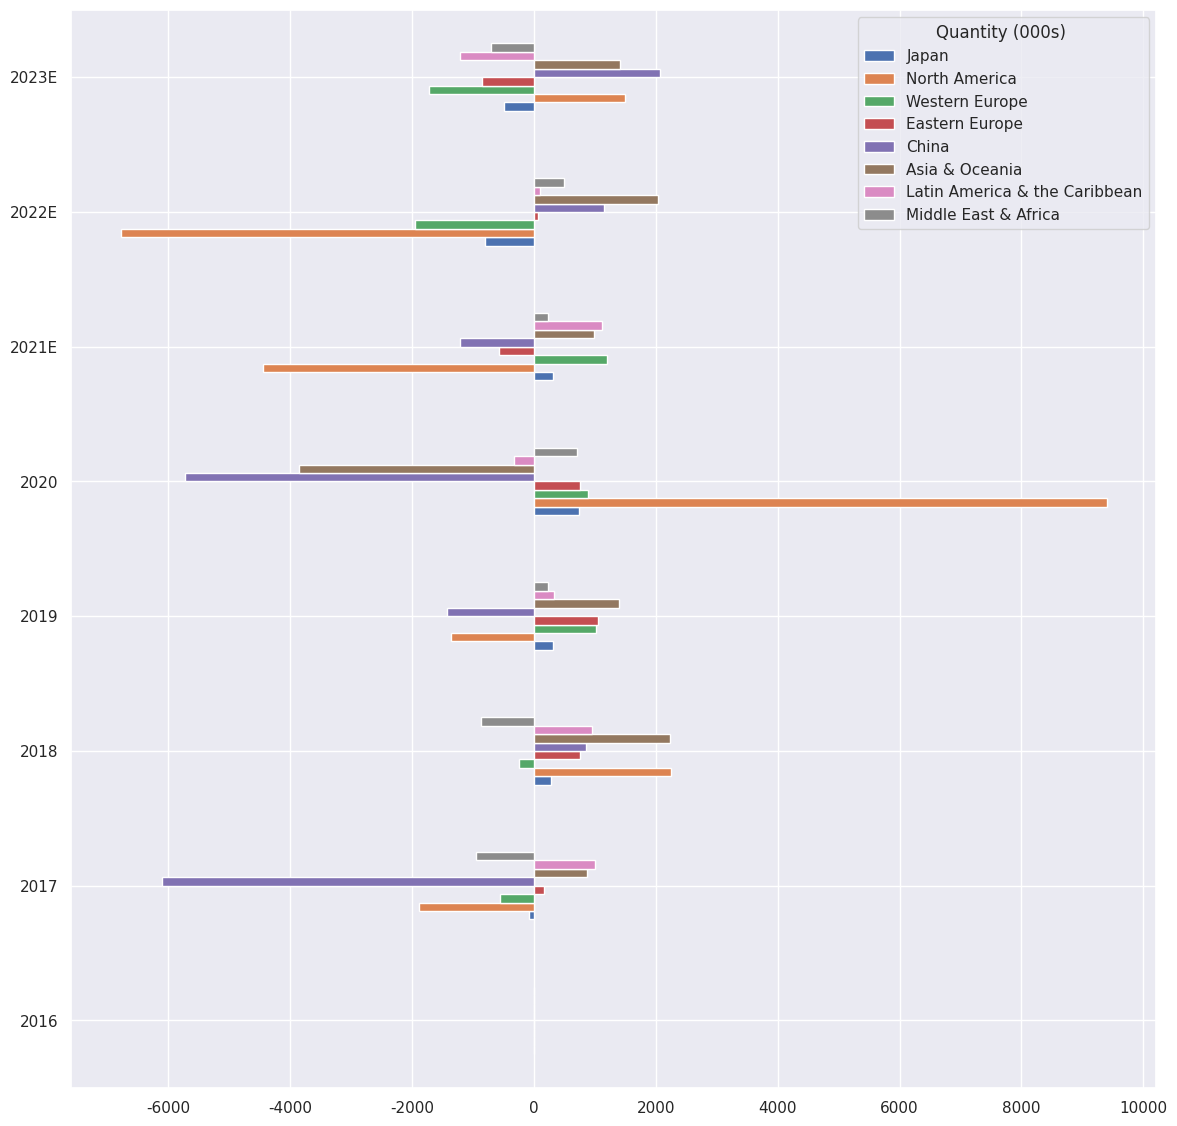

In [26]:
shipment_graph_df_T.diff().plot(figsize=(14,14), kind='barh');

- 2020년에 North America에서 엄청난 수요 폭증이 있었습니다.
- 반면 North America 에서 2021E 및 2022E에 크게 수요가 감소할 것으로 예측됩니다.
- 이는 어느정도 수요를 '땡겨 쓴'것으로 추측해볼 수 있습니다.
- TV는 교체 후 최소 몇년 간은 사용하는 경향이 있을 것이기 때문입니다.

마지막으로 ```.pct_change()``` 함수를 이용하여 절대 수치의 차이가 아닌, 직전 년도 대비 성장률을 보겠습니다

In [ ]:
shipment_graph_df_T

Quantity (000s),Japan,North America,Western Europe,Eastern Europe,China,Asia & Oceania,Latin America & the Caribbean,Middle East & Africa
2016,5043.772,43524.08680,29939.57400,14570.63600,59789.210,33598.632,22221.23400,14049.63000
2017,4960.908,41637.51744,29377.95200,14729.26500,53685.851,34464.875,23221.78907,13094.31100
2018,5240.522,43892.53100,29135.49558,15483.14075,54533.150,36690.494,24165.89400,12221.69500
2019,5556.387,42531.89200,30145.91000,16537.12400,53108.499,38091.309,24492.92600,12450.70400
2020,6294.628,51937.45599,31027.11100,17286.47700,47375.806,34235.027,24164.51800,13148.90900
2021E,6600.000,47482.00000,32218.00000,16709.00000,46168.000,35216.000,25288.00000,13376.40372
2022E,5800.000,40700.00000,30273.00000,16775.00000,47316.000,37258.000,25381.00000,13866.43992
2023E,5300.000,42200.00000,28550.00000,15921.00000,49383.000,38674.000,24160.00000,13159.70298


In [ ]:
shipment_graph_df_T.pct_change()

Quantity (000s),Japan,North America,Western Europe,Eastern Europe,China,Asia & Oceania,Latin America & the Caribbean,Middle East & Africa
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,-0.016429,-0.043345,-0.018759,0.010887,-0.102081,0.025782,0.045027,-0.067996
2018,0.056363,0.054158,-0.008253,0.051182,0.015783,0.064576,0.040656,-0.066641
2019,0.060274,-0.030999,0.034680,0.068073,-0.026124,0.038179,0.013533,0.018738
2020,0.132863,0.221141,0.029231,0.045313,-0.107943,-0.101238,-0.013408,0.056078
2021E,0.048513,-0.085785,0.038382,-0.033406,-0.025494,0.028654,0.046493,0.017301
2022E,-0.121212,-0.142833,-0.060370,0.003950,0.024866,0.057985,0.003678,0.036634
2023E,-0.086207,0.036855,-0.056915,-0.050909,0.043685,0.038005,-0.048107,-0.050967


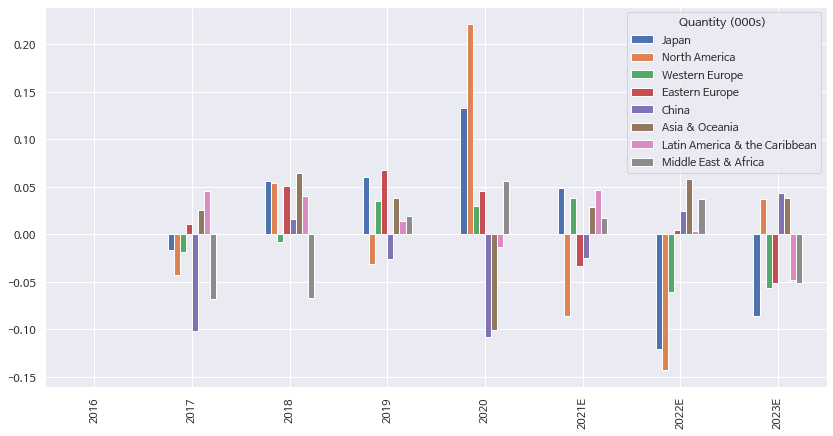

In [ ]:
shipment_graph_df_T.pct_change().plot(figsize=(14,7), kind='bar');

차이의 절대 값이 아닌 비율 값으로 성장률로 본 경우, 성장률을 %로 비교할 수 있습니다.